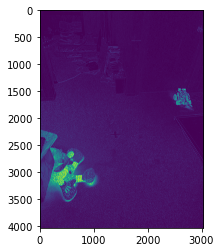

In [8]:
import matplotlib.pyplot as plt
import argparse
import imutils
import cv2
a = cv2.imread("map.jpg")
b = cv2.imread("kid.jpg")

#make a copy of original image so that we can store the
#difference of 2 images in the same
diff = a.copy()
cv2.absdiff(a, b, diff)
#converting the difference into grascale
gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
for i in range(0, 3):
    dilated = cv2.dilate(gray.copy(), None, iterations= i+ 1)


In [9]:
#threshold the gray image to binarise it. Anything pixel that has
#value more than 3 we are converting to white
#(remember 0 is black and 255 is absolute white)
#the image is called binarised as any value less than 3 will be 0 and
# all values equal to and more than 3 will be 255
(T, thresh) = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
 
# now we need to find contours in the binarised image
cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)


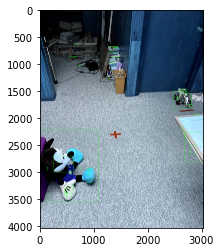

In [12]:
new = b.copy()
for c in cnts:
    # fit a bounding box to the contour
    (x, y, w, h) = cv2.boundingRect(c)
    if w>50 or h >50:
        cv2.rectangle(new, (x, y), (x + w, y + h), (0, 255, 0), 2)
 
#uncomment below 2 lines if you want to
#view the image press any key to continue
#write the identified changes to disk
cv2.imwrite("changes.png", new)
r = cv2.imread("changes.png")
plt.imshow(r)
